In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('assignment_data_cleaned.csv')
num_rows = df.shape[0]
num_col= df.shape[1]

#more cleaning
df =df.drop(df.columns[8], axis = 1)
df = df.iloc[0:459]


df

,Order ID,first_name,last_name,email,gender,Product,Product Category,Amount
0,1.0,Morganne,Gerler,mgerler0@wufoo.com,Female,Nike Air Max,Mobiles,"$1,414.86"
1,2.0,Nollie,Jakab,njakab2@diigo.com,Male,Nike Air Max,Laptop,$277.91
2,3.0,Austin,Relph,arelph3@etsy.com,Female,Amazon Echo,mobile accesories,"$1,155.54"
3,4.0,Kessia,Carrett,kcarrett4@uol.com.br,Female,Nike Air Max,mobile accesories,$32.36
4,5.0,Brod,Fallen,bfallen5@yahoo.co.jp,Male,Sony PlayStation,Fashion,$888.05
...,...,...,...,...,...,...,...,...
454,455.0,Isidore,Dorrins,idorrinsdr@census.gov,Male,Amazon Echo,Mobiles,$917.67
455,456.0,Mirilla,Fry,mfryds@sciencedaily.com,Female,MacBook Pro,mobile accesories,$293.32
456,457.0,Addy,Uff,auffdt@constantcontact.com,Female,Amazon Echo,mobile accesories,$983.96
457,458.0,Lona,Zorzutti,lzorzuttidu@reference.com,Agender,Sony PlayStation,mobile accesories,$901.79


In [74]:
df['Amount'] = df['Amount'].str.replace('$', '')
df['Amount'] = df['Amount'].str.replace(',', '')
print(round(float(df.iloc[2]['Amount']) + 1.10))
df['Amount'] = round(df['Amount'].astype(float))
print(df.iloc[2]['Amount'] + 1.10)

1157
1157.1


In [75]:
product_key = df.Product.unique()
cat_key = df['Product Category'].unique()
gender_key = df.gender.unique()
print(gender_key)

['Female' 'Male' 'Genderqueer' 'Bigender' 'Polygender' 'Non-binary'
 'Agender' 'Genderfluid']


In [76]:
print(df.iloc[0])
print(df.iloc[0]['email'])

Order ID                             1
first_name                    Morganne
last_name                       Gerler
email               mgerler0@wufoo.com
gender                          Female
Product                   Nike Air Max
Product Category               Mobiles
Amount                            1415
Name: 0, dtype: object
mgerler0@wufoo.com


In [77]:
prod_length = len(df.Product.unique())
cat_length = len(cat_key)
gen_length = len(gender_key)

num_array_cat = np.zeros(cat_length, dtype = np.int8)
num_array_prod = np.zeros(prod_length, dtype = np.int8)
num_array_gen = np.zeros(gen_length, dtype = float)

product_dict = dict(zip(product_key, num_array_prod))
cat_dict = dict(zip(cat_key, num_array_cat))
gen_dict = dict(zip(gender_key, num_array_gen))

prob = df.iloc[0]['Product']
gen_dict

{'Female': 0.0,
 'Male': 0.0,
 'Genderqueer': 0.0,
 'Bigender': 0.0,
 'Polygender': 0.0,
 'Non-binary': 0.0,
 'Agender': 0.0,
 'Genderfluid': 0.0}

In [78]:
for x in range(df.shape[0]):
    product_dict[df.iloc[x]['Product']] += 1
    cat_dict[df.iloc[x]['Product Category']] += 1
    gen_dict[df.iloc[x]['gender']] += df.iloc[x]['Amount']
    
gen_dict

{'Female': 154342.0,
 'Male': 147794.0,
 'Genderqueer': 8891.0,
 'Bigender': 6432.0,
 'Polygender': 7861.0,
 'Non-binary': 7399.0,
 'Agender': 6566.0,
 'Genderfluid': 4124.0}

<BarContainer object of 10 artists>

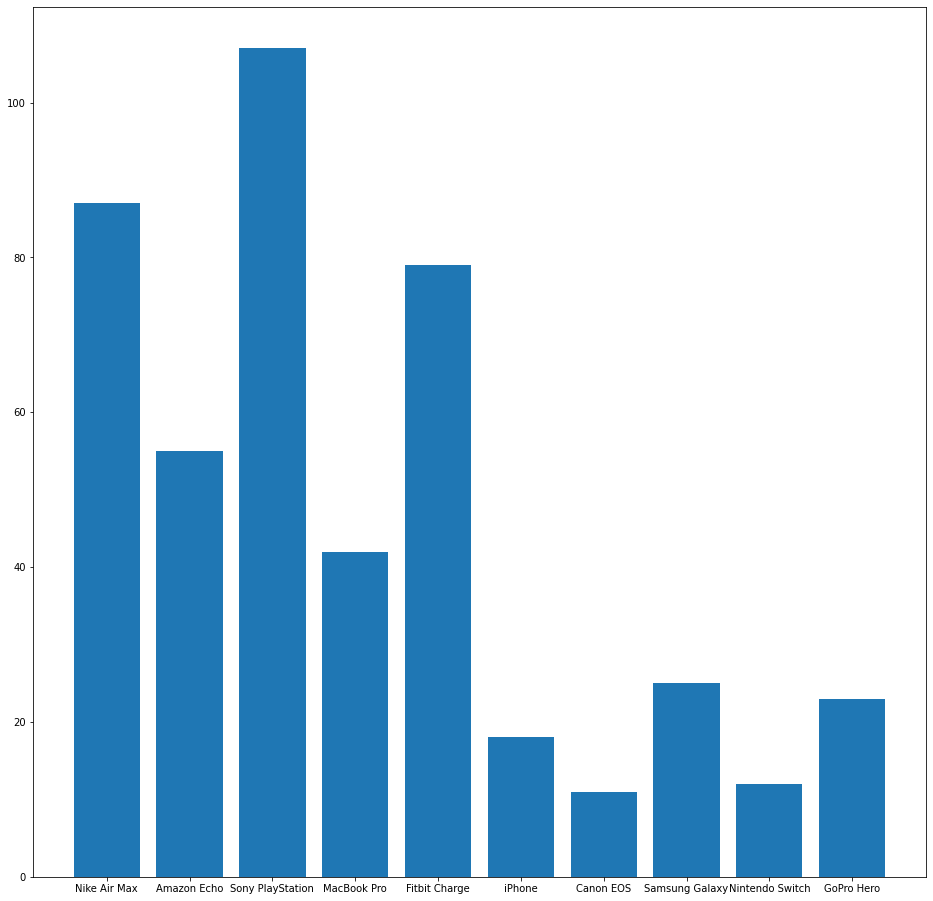

In [79]:
plt.figure(figsize = (16, 16))
plt.bar(product_dict.keys(), product_dict.values())

<BarContainer object of 6 artists>

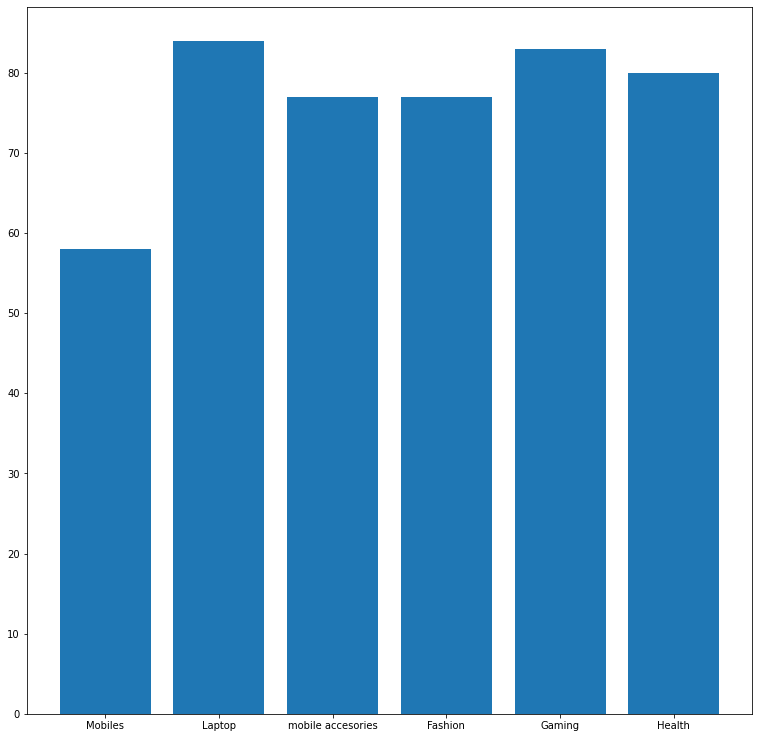

In [80]:
plt.figure(figsize = (13, 13))
plt.bar(cat_dict.keys(), cat_dict.values())

<BarContainer object of 8 artists>

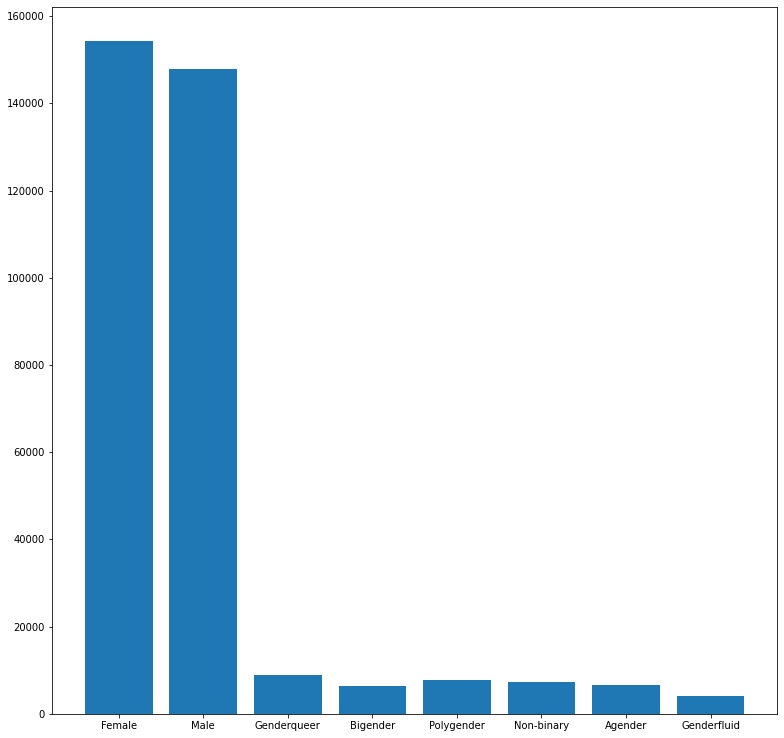

In [81]:
plt.figure(figsize = (13, 13))
plt.bar(gen_dict.keys(), gen_dict.values())

In [90]:
pivot_prod_amount = df.pivot_table(index = ['Product'], values = ['Amount'], aggfunc = 'sum')
print(pivot_prod_amount)
pivot_gen_amount = df.pivot_table(index = ['gender'], values =['Amount'], aggfunc = 'sum')
print(pivot_gen_amount)
pivot_cat_amount = df.pivot_table(index = ['Product Category'], values = ['Amount'], aggfunc = 'sum')
print(pivot_cat_amount)

pivot_combo = df.pivot_table(index = ['Product', 'Product Category'], values = ['Amount'], aggfunc = 'sum')
print(pivot_combo)

                   Amount
Product                  
Amazon Echo       38720.0
Canon EOS          9519.0
Fitbit Charge     58221.0
GoPro Hero        16606.0
MacBook Pro       35263.0
Nike Air Max      67039.0
Nintendo Switch    8058.0
Samsung Galaxy    17493.0
Sony PlayStation  79744.0
iPhone            12746.0
               Amount
gender               
Agender        6566.0
Bigender       6432.0
Female       154342.0
Genderfluid    4124.0
Genderqueer    8891.0
Male         147794.0
Non-binary     7399.0
Polygender     7861.0
                    Amount
Product Category          
Fashion            55872.0
Gaming             60962.0
Health             66052.0
Laptop             57351.0
Mobiles            44003.0
mobile accesories  59169.0
                                     Amount
Product          Product Category          
Amazon Echo      Fashion             1504.0
                 Gaming              7803.0
                 Health              9852.0
                 Laptop         